![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

# Clinical Deidentification

## **Setup**

In [1]:
import json
import os

from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml import Pipeline,PipelineModel

import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from johnsnowlabs import nlp, medical


spark = start_spark()

spark.sparkContext.setLogLevel("ERROR")

spark

📋 Loading license number 0 from /home/ubuntu/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json


24/02/12 20:53:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/12 20:53:31 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


👌 Launched cpu optimized session with with: 🚀Spark-NLP==5.2.2, 💊Spark-Healthcare==5.2.1, 🕶Spark-OCR==5.1.2, running on ⚡ PySpark==3.4.0


# Deidentification Model

Protected Health Information:
- individual’s past, present, or future physical or mental health or condition
- provision of health care to the individual
- past, present, or future payment for the health care

Protected health information includes many common identifiers (e.g., name, address, birth date, Social Security Number) when they can be associated with the health information.

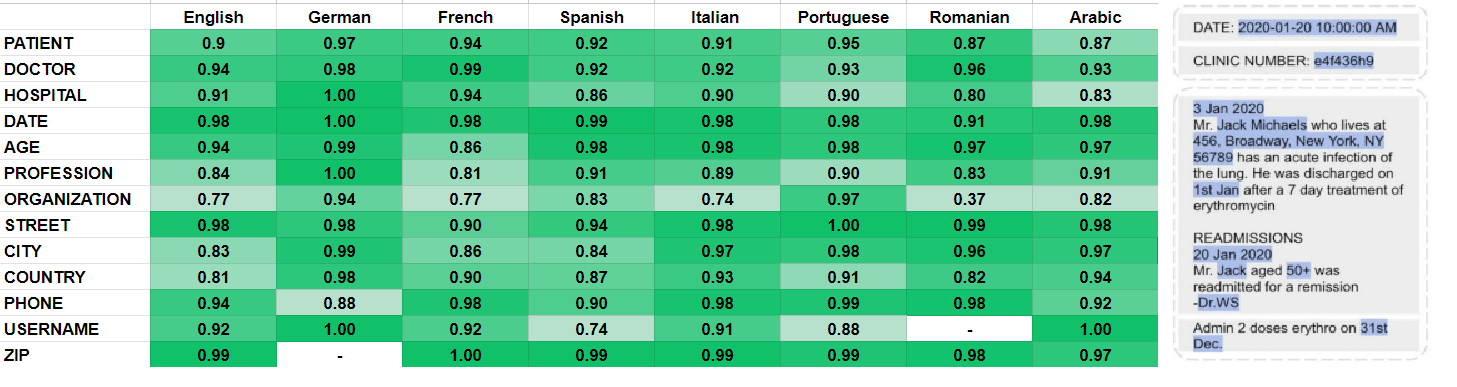

<center><b>Deidentification NER Models for English</b></center>

|index|model|lang|index|model|lang|index|model|lang|
|-----:|:-----|----|-----:|:-----|----|-----:|:-----|----|
| 1| [deidentify_dl](https://nlp.johnsnowlabs.com/2021/01/28/deidentify_dl_en.html)  |en| 7| [ner_deid_enriched_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_enriched_biobert_en.html)  |en| 13| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2021/09/03/ner_deid_subentity_augmented_en.html)  |en|
| 2| [deidentify_large](https://nlp.johnsnowlabs.com/2020/08/04/deidentify_large_en.html)  |en| 8| [ner_deid_generic_augmented](https://nlp.johnsnowlabs.com/2021/06/30/ner_deid_generic_augmented_en.html)  |en| 14| [ner_deid_subentity_augmented_i2b2](https://nlp.johnsnowlabs.com/2021/11/29/ner_deid_subentity_augmented_i2b2_en.html)  |en|
| 3| [deidentify_rb](https://nlp.johnsnowlabs.com/2019/06/04/deidentify_rb_en.html)  |en| 9| [ner_deid_generic_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_generic_glove_en.html)  |en| 15| [ner_deid_subentity_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_subentity_glove_en.html)  |en|
| 4| [ner_deid_augmented](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_augmented_en.html)  |en| 10| [ner_deid_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_large_en.html)  |en| 16| [ner_deid_synthetic](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_synthetic_en.html)  |en|
| 5| [ner_deid_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_biobert_en.html)  |en| 11| [ner_deid_sd](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_en.html)  |en| 17| [ner_deidentify_dl](https://nlp.johnsnowlabs.com/2021/03/31/ner_deidentify_dl_en.html)  |en|
| 6| [ner_deid_enriched](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_enriched_en.html)  |en| 12| [ner_deid_sd_large](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_large_en.html)  |en| | |


<center><b>Deidentification NER Models for Other Languages</b></center>

|index|model|lang|index|model|lang|
|-----:|:-----|----|-----:|:-----|----|
| 1| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/01/06/ner_deid_generic_de.html)  |de| 14| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/02/11/ner_deid_generic_fr.html)  |fr|
| 2| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/01/06/ner_deid_subentity_de.html)  |de| 15| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/02/14/ner_deid_subentity_fr.html)  |fr|
| 3| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/01/18/ner_deid_generic_es.html)  |es| 16| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/03/25/ner_deid_generic_it_3_0.html)  |it|
| 4| [ner_deid_generic_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_generic_augmented_es.html)  |es| 17| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/03/25/ner_deid_subentity_it_2_4.html)  |it|
| 5| [ner_deid_generic_roberta](https://nlp.johnsnowlabs.com/2022/01/17/ner_deid_generic_roberta_es.html)  |es| 18| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/04/13/ner_deid_generic_pt_3_0.html)  |pt|
| 6| [ner_deid_generic_roberta_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_generic_roberta_augmented_es.html)  |es| 19| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/04/13/ner_deid_subentity_pt_3_0.html)  |pt|
| 7| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/01/18/ner_deid_subentity_es.html)  |es| 20| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/06/27/ner_deid_subentity_ro_3_0.html)  |ro|
| 8| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_subentity_augmented_es.html)  |es| 21| [ner_deid_subentity_bert](https://nlp.johnsnowlabs.com/2022/06/27/ner_deid_subentity_bert_ro_3_0.html)  |ro|
| 9| [ner_deid_subentity_roberta](https://nlp.johnsnowlabs.com/2022/01/17/ner_deid_subentity_roberta_es.html)  |es| 22| [ner_deid_generic](https://nlp.johnsnowlabs.com/models)  |ro|
| 10| [ner_deid_subentity_roberta_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_subentity_roberta_augmented_es.html)  |es| 23| [ner_deid_generic_bert](https://nlp.johnsnowlabs.com/models)  |ro|
| 11| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2023/05/31/ner_deid_subentity_ar.html)  |ar| 24| [ner_deid_generic](https://nlp.johnsnowlabs.com/2023/05/30/ner_deid_generic_ar.html)  |ar|
 12|[`ner_deid_subentity_arabert`](https://nlp.johnsnowlabs.com/2023/09/16/ner_deid_subentity_arabert_en.html)   |ar| 25|[`ner_deid_generic_arabert`](https://nlp.johnsnowlabs.com/2023/09/16/ner_deid_generic_arabert_en.html)   |ar|
 13| [`ner_deid_subentity_camelbert`](https://nlp.johnsnowlabs.com/2023/09/22/ner_deid_subentity_camelbert_en.html) |ar| 26| [`ner_deid_generic_camelbert`](https://nlp.johnsnowlabs.com/2023/09/16/ner_deid_generic_camelbert_en.html) |ar|



You can find German, Spanish, French, Italian, Portuguese and Romanian deidentification models and pretrained pipeline examples in this notebook:   [Clinical Multi Language Deidentification Notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/04.1.Clinical_Multi_Language_Deidentification.ipynb)

**Let's start!**

Load NER pipeline to identify protected entities:

In [2]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector annotator, processes various sentences per line
sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
clinical_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter = medical.NerConverter()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk")

nlpPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[ | ]embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
Download done! Loading the resource.
[OK!]
ner_deid_generic_augmented download started this may take some time.
[ | ]ner_deid_generic_augmented download started this may take some time.
Approximate size to download 13.8 MB
Download done! Loading the resource.
[ / ]

[OK!]


### Pretrained NER models extracts:

- Name
- Profession
- Age
- Date
- Contact(Telephone numbers, FAX numbers, Email addresses)
- Location (Address, City, Postal code, Hospital Name, Employment information)
- Id (Social Security numbers, Medical record numbers, Internet protocol addresses)

In [3]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , 
MR # 7194334 Date : 01/13/93 . PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . 
Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .
'''

In [4]:
result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [5]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.ner.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"))

In [6]:
result_df.select("token", "ner_label").groupBy('ner_label').count().orderBy('count', ascending=False).show(truncate=False)

+----------+-----+
|ner_label |count|
+----------+-----+
|O         |29   |
|I-LOCATION|5    |
|B-NAME    |3    |
|B-DATE    |3    |
|B-LOCATION|2    |
|I-NAME    |2    |
|B-ID      |1    |
|B-AGE     |1    |
|B-CONTACT |1    |
+----------+-----+



### **Check extracted sensetive entities**

In [7]:
result.select(F.explode(F.arrays_zip(result.ner_chunk.result, 
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-----------------------------+---------+
|chunk                        |ner_label|
+-----------------------------+---------+
|2093-01-13                   |DATE     |
|David Hale                   |NAME     |
|Hendrickson Ora              |NAME     |
|7194334                      |ID       |
|01/13/93                     |DATE     |
|Oliveira                     |NAME     |
|25                           |AGE      |
|2079-11-09                   |DATE     |
|Cocke County Baptist Hospital|LOCATION |
|0295 Keats Street            |LOCATION |
|55-555-5555                  |CONTACT  |
+-----------------------------+---------+



### **Excluding entities from deidentification**

Sometimes we need to leave some entities in the text, for example, if we want to analyze the frequency of the disease by the hospital. In this case, we need to use parameter **`setWhiteList()`** to modify `ner_chunk` output. This parameter having using a list of entities type to deidentify as an input. So, if we want to leave the location in the list we need to remove this tag from the list:

In [8]:
ner_converter = medical.NerConverter()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk") \
    .setWhiteList(['NAME', 'PROFESSION', 'ID', 'AGE', 'DATE'])

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    clinical_ner,
    ner_converter])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_with_white_list = nlpPipeline.fit(empty_data)

In [9]:
result_with_white_list = model_with_white_list.transform(spark.createDataFrame([[text]]).toDF("text"))

In [10]:
print("All Labels :")
result.select(F.explode(F.arrays_zip(result.ner_chunk.result, 
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

print("WhiteListed Labels: ")
result_with_white_list.select(F.explode(F.arrays_zip(result_with_white_list.ner_chunk.result, 
                                                     result_with_white_list.ner_chunk.metadata)).alias("cols")) \
                      .select(F.expr("cols['0']").alias("chunk"),
                              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

All Labels :
+-----------------------------+---------+
|chunk                        |ner_label|
+-----------------------------+---------+
|2093-01-13                   |DATE     |
|David Hale                   |NAME     |
|Hendrickson Ora              |NAME     |
|7194334                      |ID       |
|01/13/93                     |DATE     |
|Oliveira                     |NAME     |
|25                           |AGE      |
|2079-11-09                   |DATE     |
|Cocke County Baptist Hospital|LOCATION |
|0295 Keats Street            |LOCATION |
|55-555-5555                  |CONTACT  |
+-----------------------------+---------+

WhiteListed Labels: 
+---------------+---------+
|chunk          |ner_label|
+---------------+---------+
|2093-01-13     |DATE     |
|David Hale     |NAME     |
|Hendrickson Ora|NAME     |
|7194334        |ID       |
|01/13/93       |DATE     |
|Oliveira       |NAME     |
|25             |AGE      |
|2079-11-09     |DATE     |
+---------------+---------+

## **Masking and Obfuscation**

### **Replace this enitites with Tags**

In [11]:
ner_converter = medical.NerConverter()\
      .setInputCols(["sentence", "token", "ner"])\
      .setOutputCol("ner_chunk") 

deidentification = medical.DeIdentification() \
      .setInputCols(["sentence", "token", "ner_chunk"]) \
      .setOutputCol("deidentified") \
      .setMode("mask")\
      .setReturnEntityMappings(True) #  return a new column to save the mappings between the mask/obfuscated entities and original entities.
      #.setMappingsColumn("MappingCol") # change the name of the column, 'aux' is default

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      deidentification])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_deid = deidPipeline.fit(empty_data)

In [12]:
result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))

In [13]:
result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|        deidentified|                 aux|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|\nRecord date : 2...|[{document, 0, 23...|[{document, 1, 45...|[{token, 1, 6, Re...|[{word_embeddings...|[{named_entity, 1...|[{chunk, 15, 24, ...|[{document, 0, 36...|[{chunk, 14, 19, ...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+



In [14]:
result.select(F.explode(F.arrays_zip(result.sentence.result, result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : <DATE> , <NAME> , M.D ."
1,", Name : Hendrickson Ora , \nMR # 7194334 Date...",", Name : <NAME> , \nMR # <ID> Date : <DATE> ."
2,"PCP : Oliveira , 25 years-old , Record date : ...","PCP : <NAME> , <AGE> years-old , Record date :..."
3,"Cocke County Baptist Hospital , 0295 Keats Str...","<LOCATION> , <LOCATION> , Phone <CONTACT> ."


We have three modes to mask the entities in the Deidentification annotator. You can select the modes using the `.setMaskingPolicy()` parameter. The methods are the followings:

**“entity_labels”**: Mask with the entity type of that chunk. (default) <br/>
**“same_length_chars”**: Mask the deid entities with same length of asterix ( * ) with brackets ( [ , ] ) on both end. <br/>
**“fixed_length_chars”**: Mask the deid entities with a fixed length of asterix ( * ). The length is setting up using the `setFixedMaskLength()` method. <br/>
Let's try each of these and compare the results. 

In [15]:
#deid model with "entity_labels"
deid_entity_labels= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_entity_label")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("entity_labels")

#deid model with "same_length_chars"
deid_same_length= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_same_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("same_length_chars")

#deid model with "fixed_length_chars"
deid_fixed_length= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_fixed_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("fixed_length_chars")\
    .setFixedMaskLength(4)


deidPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      deid_entity_labels,
      deid_same_length,
      deid_fixed_length])


empty_data = spark.createDataFrame([[""]]).toDF("text")
model_deid = deidPipeline.fit(empty_data)

In [16]:
policy_result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))

In [17]:
policy_result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|   deid_entity_label|                 aux|    deid_same_length|   deid_fixed_length|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|\nRecord date : 2...|[{document, 0, 23...|[{document, 1, 45...|[{token, 1, 6, Re...|[{word_embeddings...|[{named_entity, 1...|[{chunk, 15, 24, ...|[{document, 0, 36...|[{chunk, 14, 17, ...|[{document, 0, 44...|[{document, 0, 32...|
+--------------------+--------------------+--------------------+----

In [18]:
policy_result.select(F.explode(F.arrays_zip(policy_result.sentence.result, 
                                            policy_result.deid_entity_label.result, 
                                            policy_result.deid_same_length.result, 
                                            policy_result.deid_fixed_length.result)).alias("cols")) \
             .select(F.expr("cols['0']").alias("sentence"),
                     F.expr("cols['1']").alias("deid_entity_label"),
                     F.expr("cols['2']").alias("deid_same_length"),
                     F.expr("cols['3']").alias("deid_fixed_length")).toPandas()

,sentence,deid_entity_label,deid_same_length,deid_fixed_length
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : <DATE> , <NAME> , M.D .","Record date : [********] , [********] , M.D .","Record date : **** , **** , M.D ."
1,", Name : Hendrickson Ora , \nMR # 7194334 Date...",", Name : <NAME> , \nMR # <ID> Date : <DATE> .",", Name : [*************] , \nMR # [*****] Date...",", Name : **** , \nMR # **** Date : **** ."
2,"PCP : Oliveira , 25 years-old , Record date : ...","PCP : <NAME> , <AGE> years-old , Record date :...","PCP : [******] , ** years-old , Record date : ...","PCP : **** , **** years-old , Record date : **..."
3,"Cocke County Baptist Hospital , 0295 Keats Str...","<LOCATION> , <LOCATION> , Phone <CONTACT> .","[***************************] , [*************...","**** , **** , Phone **** ."


### **Mapping Column**

In [19]:
result.select("aux").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
result.select(F.explode(F.arrays_zip(result.aux.metadata, 
                                     result.aux.result, 
                                     result.aux.begin, 
                                     result.aux.end)).alias("cols")) \
      .select(F.expr("cols['0']['originalChunk']").alias("chunk"),
              F.expr("cols['0']['beginOriginalChunk']").alias("beginChunk"),
              F.expr("cols['0']['endOriginalChunk']").alias("endChunk"),
              F.expr("cols['1']").alias("label"),
              F.expr("cols['2']").alias("beginLabel"),
              F.expr("cols['3']").alias("endLabel")).show(truncate=False)

+-----------------------------+----------+--------+----------+----------+--------+
|chunk                        |beginChunk|endChunk|label     |beginLabel|endLabel|
+-----------------------------+----------+--------+----------+----------+--------+
|2093-01-13                   |15        |24      |<DATE>    |14        |19      |
|David Hale                   |28        |37      |<NAME>    |23        |28      |
|Hendrickson Ora              |56        |70      |<NAME>    |46        |51      |
|7194334                      |80        |86      |<ID>      |61        |64      |
|01/13/93                     |95        |102     |<DATE>    |73        |78      |
|Oliveira                     |112       |119     |<NAME>    |87        |92      |
|25                           |123       |124     |<AGE>     |96        |100     |
|2079-11-09                   |152       |161     |<DATE>    |128       |133     |
|Cocke County Baptist Hospital|166       |194     |<LOCATION>|136       |145     |
|029

## **Reidentification**

We can use `ReIdentification` annotator to go back to the original sentence.

In [21]:
reIdentification = medical.ReIdentification()\
    .setInputCols(["aux","deidentified"])\
    .setOutputCol("original")

In [22]:
reid_result = reIdentification.transform(result)

In [23]:
reid_result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|        deidentified|                 aux|            original|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|\nRecord date : 2...|[{document, 0, 23...|[{document, 1, 45...|[{token, 1, 6, Re...|[{word_embeddings...|[{named_entity, 1...|[{chunk, 15, 24, ...|[{document, 0, 36...|[{chunk, 14, 19, ...|[{document, 1, 45...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----

In [24]:
print(text)

reid_result.select('original.result').show(truncate=False)


Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , 
MR # 7194334 Date : 01/13/93 . PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . 
Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                           |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[Record date : 2093-01-13 , 

## **Using multiple NER in the same pipeline**

In [25]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

deid_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_generic")

ner_converter = medical.NerConverter()\
    .setInputCols(["sentence", "token", "ner_generic"])\
    .setOutputCol("ner_generic_chunk")\
    .setWhiteList(['ID', 'DATE', 'AGE', 'NAME', 'PROFESSION'])# CONTACT and LOCATION is removed

deid_ner_enriched = medical.NerModel.pretrained("ner_deid_subentity_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_subentity")

ner_converter_enriched = medical.NerConverter() \
    .setInputCols(["sentence", "token", "ner_subentity"]) \
    .setOutputCol("ner_subentity_chunk")\
    .setWhiteList(['COUNTRY', 'CITY', 'HOSPITAL', 'STATE', 'STREET', 'ZIP'])
    # we can also add PATIENT and DOCTOR entities and remove NAME entity from the other NER model

chunk_merge = medical.ChunkMergeApproach()\
    .setInputCols("ner_subentity_chunk","ner_generic_chunk")\
    .setOutputCol("deid_merged_chunk")

deidentification = medical.DeIdentification() \
    .setInputCols(["sentence", "token", "deid_merged_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("mask")\
    .setIgnoreRegex(True)


nlpPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      ner_converter,
      deid_ner_enriched,
      ner_converter_enriched,
      chunk_merge,
      deidentification])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]
ner_deid_subentity_augmented download started this may take some time.
[ | ]ner_deid_subentity_augmented download started this may take some time.
Approximate size to download 14.1 MB
Download done! Loading the resource.
[OK!]


In [26]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , MR # 7194334 Date : 01/13/93 . 
PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital , 0295 Keats Street , Phone 302-786-5227.
'''

In [27]:
result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

# ner_deid_generic_augmented
result.select(F.explode(F.arrays_zip(result.ner_generic_chunk.result, 
                                     result.ner_generic_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+---------------+---------+
|chunk          |ner_label|
+---------------+---------+
|2093-01-13     |DATE     |
|David Hale     |NAME     |
|Hendrickson Ora|NAME     |
|7194334        |ID       |
|01/13/93       |DATE     |
|Oliveira       |NAME     |
|25             |AGE      |
|2079-11-09     |DATE     |
+---------------+---------+



In [28]:
# ner_deid_subentity_augmented
result.select(F.explode(F.arrays_zip(result.ner_subentity_chunk.result, 
                                     result.ner_subentity_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-----------------------------+---------+
|chunk                        |ner_label|
+-----------------------------+---------+
|Cocke County Baptist Hospital|HOSPITAL |
|0295 Keats Street            |STREET   |
+-----------------------------+---------+



In [29]:
# merged chunk
result.select(F.explode(F.arrays_zip(result.deid_merged_chunk.result, 
                                     result.deid_merged_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-----------------------------+---------+
|chunk                        |ner_label|
+-----------------------------+---------+
|2093-01-13                   |DATE     |
|David Hale                   |NAME     |
|Hendrickson Ora              |NAME     |
|7194334                      |ID       |
|01/13/93                     |DATE     |
|Oliveira                     |NAME     |
|25                           |AGE      |
|2079-11-09                   |DATE     |
|Cocke County Baptist Hospital|HOSPITAL |
|0295 Keats Street            |STREET   |
+-----------------------------+---------+



In [30]:
result.select(F.explode(F.arrays_zip(result.sentence.result, 
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : <DATE> , <NAME> , M.D ."
1,", Name : Hendrickson Ora , MR # 7194334 Date :...",", Name : <NAME> , MR # <ID> Date : <DATE> ."
2,"PCP : Oliveira , 25 years-old , Record date : ...","PCP : <NAME> , <AGE> years-old , Record date :..."
3,"Cocke County Baptist Hospital , 0295 Keats Str...","<HOSPITAL> , <STREET> , Phone 302-786-5227."


### **Enriching with Regex and Override NER**




In [31]:
# Text with MR number
text ='''Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR . # 7194334 
Date : 01/13/93 PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street.'''

In [32]:
deidentification = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "deid_merged_chunk"])\
    .setOutputCol("deidentified")\
    .setMode("mask") \
    .setRegexOverride(False) # Prioritizing NER model

pipeline = nlp.Pipeline(stages=[
    nlpPipeline, 
    deidentification
])

model_default_rgx = pipeline.fit(empty_data)

In [33]:
result = model_default_rgx.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result, 
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : <DATE> , <NAME> , M.D ."
1,", Name : Hendrickson , Ora MR .",", Name : <NAME> MR ."
2,"# 7194334 \nDate : 01/13/93 PCP : Oliveira , 2...","# <ID> \nDate : <DATE> PCP : <NAME> , <AGE> ye..."
3,Cocke County Baptist Hospital .,<HOSPITAL> .
4,0295 Keats Street.,<STREET>


**Override default regex patterns**

We see that two entities  have conflict between the regex and the NER. NER has the priroty as a default. We can change this `setRegexOverride` param

In [34]:
# Creating regex rule for detecting MR number and AGE
rgx = '''NUMBER ([0-9]{2})
NUMBER (\d{7})''' 

with open("./custom_regex.txt", "w") as f:
  f.write(rgx)

f = open("./custom_regex.txt", "r")

print(f.read())

NUMBER ([0-9]{2})
NUMBER (\d{7})


We see that two entities  have conflict between the regex and the NER. NER has the priroty as a default. We can change this `setRegexOverride` param 

In [35]:
deidentification_rgx = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "deid_merged_chunk"])\
    .setOutputCol("deidentified")\
    .setMode("mask") \
    .setRegexPatternsDictionary("./custom_regex.txt")\
    .setRegexOverride(True) # Prioritizing regex rules

nlpPipeline_rgx = nlp.Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner,
    ner_converter,
    deid_ner_enriched,
    ner_converter_enriched,
    chunk_merge,
    deidentification_rgx])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_rgx = nlpPipeline_rgx.fit(empty_data)

In [36]:
result = model_rgx.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result, 
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : <DATE> , <NAME> , M.D ."
1,", Name : Hendrickson , Ora MR .",", Name : <NAME> MR ."
2,"# 7194334 \nDate : 01/13/93 PCP : Oliveira , 2...","# <NUMBER> \nDate : <DATE> PCP : <NAME> , <NUM..."
3,Cocke County Baptist Hospital .,<HOSPITAL> .
4,0295 Keats Street.,<STREET>


**json-based custom regex patterns**

Sets dictionary with regular expression patterns as JSON that match some protected entity

```
deid = DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("mask") \
    .setRegexOverride(True)\
    .setRegexPatternsDictionaryAsJsonString("{'NUMBER':'\d+'},"+
                                            "{'NUMBER':'(\d+.?\d+.?\d+)'}")
```

**Merging default regex rules and custom user-defined regex**

Whether to combine regex files or not. If the value is 'True', both file will be used. Default: False.

```
deid = DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("mask") \
    .setCombineRegexPatterns(True)\
    .setRegexPatternsDictionary("./custom_regex.txt")
```

`.setBlackList()` parameter so that not deidentifiy the labels that are specified in the list. This parameter filters just the detected Regex Entities. 

In [37]:
ner_converter = medical.NerConverter()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk")\
    .setWhiteList(["NAME", "LOCATION"])

# DATE, PHONE, URL, EMAIL, ZIP, DATE, SSN, PASSPORT, DLN, NPI, C_CARD, EMAIL, IBAN, DEA
deidentification = medical.DeIdentification() \
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("mask")\
    .setRegexOverride(True)\
    .setBlackList(["DATE", "PHONE"]) # List of entities ignored for masking or obfuscation, default listed above

deidPipeline = nlp.Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    clinical_ner,
    ner_converter,
    deidentification])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_deid = deidPipeline.fit(empty_data)

In [38]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR . # 7194334 
Date : 01/13/93 PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street. Phone (302) 786-5227.
'''
result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))

In [39]:
result.select(F.explode(F.arrays_zip(result.sentence.result, 
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-01-13 , <NAME> , M.D ."
1,", Name : Hendrickson , Ora MR .",", Name : <NAME> MR ."
2,"# 7194334 \nDate : 01/13/93 PCP : Oliveira , 2...","# 7194334 \nDate : 01/13/93 PCP : <NAME> , 25 ..."
3,Cocke County Baptist Hospital .,<LOCATION> .
4,0295 Keats Street.,<LOCATION>.
5,Phone (302) 786-5227.,Phone (302) 786-5227.


## Obfuscation mode

In the obfuscation mode **DeIdentificationModel** will replace sensetive entities with random values of the same type. 


In [40]:
obs_lines = """Marvin MARSHALL#PATIENT
Hubert GROGAN#PATIENT
ALTHEA COLBURN#PATIENT
Kalil AMIN#PATIENT
Inci FOUNTAIN#PATIENT
Ekaterina Rosa#DOCTOR
Rudiger Chao#DOCTOR
COLLETTE KOHLER#DOCTOR
Mufi HIGGS#DOCTOR"""


with open ('obfuscation.txt', 'w') as f:
  f.write(obs_lines)

In [41]:
deid_ner_enriched = medical.NerModel.pretrained("ner_deid_subentity_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_subentity")

ner_converter_enriched = medical.NerConverter() \
    .setInputCols(["sentence", "token", "ner_subentity"]) \
    .setOutputCol("ner_subentity_chunk")\

obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_subentity_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    #.setObfuscateRefFile('obfuscation.txt')\
    #.setObfuscateRefSource("both") #default: "faker"

pipeline = nlp.Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner_enriched,
    ner_converter_enriched,
    obfuscation
])

obfuscation_model = pipeline.fit(empty_data)

ner_deid_subentity_augmented download started this may take some time.
[OK!]


In [42]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR # 7194334 
Date : 01/13/93 . Patient : Oliveira, 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street
'''

result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result, result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-02-26 , Creta Levin , M.D ."
1,", Name : Hendrickson , Ora MR # 7194334 \nDate...",", Name : Hayden Rasmussen MR # 9569533 \nDate ..."
2,"Patient : Oliveira, 25 years-old , Record date...","Patient : Domingo Dimes, 35 years-old , Record..."
3,Cocke County Baptist Hospital .,WELLMONT-HOLSTON VALLEY MEDICAL CENTER .
4,0295 Keats Street,4900 Broad Rd


In [43]:
result.select("ner_subentity_chunk").collect()

[Row(ner_subentity_chunk=[Row(annotatorType='chunk', begin=15, end=24, result='2093-01-13', metadata={'sentence': '0', 'chunk': '0', 'ner_source': 'ner_subentity_chunk', 'entity': 'DATE', 'confidence': '1.0'}, embeddings=[]), Row(annotatorType='chunk', begin=28, end=37, result='David Hale', metadata={'sentence': '0', 'chunk': '1', 'ner_source': 'ner_subentity_chunk', 'entity': 'DOCTOR', 'confidence': '0.9992'}, embeddings=[]), Row(annotatorType='chunk', begin=56, end=72, result='Hendrickson , Ora', metadata={'sentence': '1', 'chunk': '2', 'ner_source': 'ner_subentity_chunk', 'entity': 'PATIENT', 'confidence': '0.97753334'}, embeddings=[]), Row(annotatorType='chunk', begin=79, end=85, result='7194334', metadata={'sentence': '1', 'chunk': '3', 'ner_source': 'ner_subentity_chunk', 'entity': 'MEDICALRECORD', 'confidence': '0.9981'}, embeddings=[]), Row(annotatorType='chunk', begin=95, end=102, result='01/13/93', metadata={'sentence': '1', 'chunk': '4', 'ner_source': 'ner_subentity_chunk', 

In [44]:
obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_subentity_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefFile('obfuscation.txt')\
    .setObfuscateRefSource("file")

pipeline = nlp.Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner_enriched,
    ner_converter_enriched,
    obfuscation
])

obfuscation_model = pipeline.fit(empty_data)      
      
      
result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result, 
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-01-17 , COLLETTE KOHLER , M..."
1,", Name : Hendrickson , Ora MR # 7194334 \nDate...",", Name : Marvin MARSHALL MR # 4263657 \nDate :..."
2,"Patient : Oliveira, 25 years-old , Record date...","Patient : Kalil AMIN, <AGE> years-old , Record..."
3,Cocke County Baptist Hospital .,<HOSPITAL> .
4,0295 Keats Street,<STREET>


## Faker mode

The faker module allow to the user to use a set of fake entities that are in the memory of the spark-nlp-internal. You can setting up this module using the the following property setObfuscateRefSource('faker').

If we select the setObfuscateRefSource('both') then we choose randomly the entities using the faker and the fakes entities from the obfuscateRefFile.


The entities that are allowed right now are the followings:

* Location
* Location-other
* Hospital
* City
* State
* Zip
* Country
* Contact
* Username
* Phone
* Fax
* Url
* Email
* Profession
* Name
* Doctor
* Patient
* Id
* Idnum
* Bioid
* Age
* Organization
* Healthplan
* Medicalrecord
* Ssn
* Passport
* DLN
* NPI
* C_card
* IBAN
* DEA
* Device




In [45]:
obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_subentity_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefSource("faker") \

pipeline = nlp.Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner_enriched,
    ner_converter_enriched,
    obfuscation
])

obfuscation_model = pipeline.fit(empty_data)

In [46]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR # 7194334 
Date : 01/13/93 . Patient : Oliveira, 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street
'''

result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-03-09 , Lourdes Sledge , M.D ."
1,", Name : Hendrickson , Ora MR # 7194334 \nDate...",", Name : Hassie Bruce MR # 3684542 \nDate : 03..."
2,"Patient : Oliveira, 25 years-old , Record date...","Patient : Jacki Cones, 35 years-old , Record d..."
3,Cocke County Baptist Hospital .,MAYO CLINIC HEALTH SYS WASECA .
4,0295 Keats Street,Robynborough


## Use full pipeline in the Light model

In [47]:
light_model = nlp.LightPipeline(model)
annotated_text = light_model.annotate(text)
annotated_text['deidentified']

['Record date : <DATE> , <NAME> , M.D .',
 ', Name : <NAME> MR # <ID> \nDate : <DATE> .',
 'Patient : <NAME>, <AGE> years-old , Record date : <DATE> .',
 '<HOSPITAL> .',
 '<STREET>']

In [48]:
obf_light_model = nlp.LightPipeline(obfuscation_model)
annotated_text = obf_light_model.annotate(text)
annotated_text['deidentified']

['Record date : 2093-03-09 , Lourdes Sledge , M.D .',
 ', Name : Hassie Bruce MR # 3684542 \nDate : 03/09/93 .',
 'Patient : Jacki Cones, 35 years-old , Record date : 2080-01-03 .',
 'MAYO CLINIC HEALTH SYS WASECA .',
 'Robynborough']

# Age Groups Obfuscation

In [49]:
ner_converter = medical.NerConverter()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("age_chunk")\
    .setWhiteList(["AGE"])

obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "age_chunk"]) \
    .setOutputCol("obfuscation") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefSource("faker") \
    .setAgeRanges([1, 4, 12, 20, 40, 60, 80])

nlpPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      obfuscation
      ])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_agerange = nlpPipeline.fit(empty_data)

In [50]:
# Infant = 0-1 year.
# Toddler = 2-4 yrs.
# Child = 5-12 yrs.
# Teen = 13-19 yrs.
# Adult = 20-39 yrs.
# Middle Age Adult = 40-59 yrs.
# Senior Adult = 60+

dates = [
'1 year old baby',
'4 year old kids',
'A 15 year old female with',
'Record date: 2093-01-13, Age: 25',
'Patient is 45 years-old',
'He is 65 years-old male'
]
from pyspark.sql.types import StringType
df_dates = spark.createDataFrame(dates,StringType()).toDF('text')


result = model_agerange.transform(df_dates)

result_df = result.select("text",F.explode(F.arrays_zip(result.age_chunk.result, 
                                                        result.obfuscation.result)).alias("cols")) \
                  .select("text",F.expr("cols['0']").alias("age_chunk"),
                                 F.expr("cols['1']").alias("obfuscation"))
                  
result_df.show(truncate=False)

+--------------------------------+---------+--------------------------------+
|text                            |age_chunk|obfuscation                     |
+--------------------------------+---------+--------------------------------+
|1 year old baby                 |1        |3 year old baby                 |
|4 year old kids                 |4        |7 year old kids                 |
|A 15 year old female with       |15       |A 12 year old female with       |
|Record date: 2093-01-13, Age: 25|25       |Record date: 2093-03-04, Age: 38|
|Patient is 45 years-old         |45       |Patient is 48 years-old         |
|He is 65 years-old male         |65       |He is 72 years-old male         |
+--------------------------------+---------+--------------------------------+



## NameChunkObfuscatorApproach

In [51]:
names = """Mitchell#NAME
Clifford#NAME
Jeremiah#NAME
Lawrence#NAME
Brittany#NAME
Patricia#NAME
Samantha#NAME
Jennifer#NAME
Jackson#NAME
Leonard#NAME
Randall#NAME
Camacho#NAME
Ferrell#NAME
Mueller#NAME
Bowman#NAME
Hansen#NAME
Acosta#NAME
Gillespie#NAME
Zimmerman#NAME
Gillespie#NAME
Chandler#NAME
Bradshaw#NAME
Ferguson#NAME
Jacobson#NAME
Figueroa#NAME
Chandler#NAME
Schaefer#NAME
Matthews#NAME
Ferguson#NAME
Bradshaw#NAME
Figueroa#NAME
Delacruz#NAME
Gallegos#NAME
Villarreal#NAME
Williamson#NAME
Montgomery#NAME
Mclaughlin#NAME
Blankenship#NAME
Fitzpatrick#NAME
"""

with open('names_test.txt', 'w') as file:
    file.write(names)

In [52]:
documentAssembler = nlp.DocumentAssembler()\
  .setInputCol("text")\
  .setOutputCol("sentence")\

tokenizer = nlp.Tokenizer()\
  .setInputCols("sentence")\
  .setOutputCol("token")\

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
clinical_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter_name = medical.NerConverter()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

nameChunkObfuscator = medical.NameChunkObfuscatorApproach()\
  .setInputCols("ner_chunk")\
  .setOutputCol("replacement")\
  .setRefFileFormat("csv")\
  .setObfuscateRefFile("names_test.txt")\
  .setRefSep("#")\

replacer_name = medical.Replacer()\
  .setInputCols("replacement","sentence")\
  .setOutputCol("obfuscated_document_name")\
  .setUseReplacement(True)

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    tokenizer,
    word_embeddings,
    clinical_ner,
    ner_converter_name,
    nameChunkObfuscator,
    replacer_name,
    ])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model_chunck_obfuscator = nlpPipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]


In [53]:
sample_text = '''John Davies is a 62 y.o. patient admitted. Mr. Davies was seen by attending physician Dr. Lorand and was scheduled for emergency assessment.'''

lmodel = nlp.LightPipeline(model_chunck_obfuscator)

res = lmodel.fullAnnotate(sample_text)

In [54]:
print("Original text.  : ", res[0]['sentence'][0].result)
print("Obfuscated text : ", res[0]['obfuscated_document_name'][0].result)

Original text.  :  John Davies is a 62 y.o. patient admitted. Mr. Davies was seen by attending physician Dr. Lorand and was scheduled for emergency assessment.
Obfuscated text :  Patriciaann is a 62 y.o. patient admitted. Mr. Noella was seen by attending physician Dr. Genice and was scheduled for emergency assessment.


## Shifting Days

In the examples above, we replaced date entities with another date randomly. Instead of that, we can shift the date according to any column.

In [55]:
import pandas as pd

data = pd.DataFrame(
    {'patientID' : ['A001', 'A001', 'A002', 'A002'],
     'text' : ['Chris Brown was discharged on 10/02/2022', 
               'Mark White was discharged on 02/28/2020', 
               'John was discharged on 03/15/2022',
               'John Moore was discharged on 12/31/2022'
              ]
    }
)

my_input_df = spark.createDataFrame(data)

my_input_df.show(truncate = False)

+---------+----------------------------------------+
|patientID|text                                    |
+---------+----------------------------------------+
|A001     |Chris Brown was discharged on 10/02/2022|
|A001     |Mark White was discharged on 02/28/2020 |
|A002     |John was discharged on 03/15/2022       |
|A002     |John Moore was discharged on 12/31/2022 |
+---------+----------------------------------------+



### Shifting days according to the ID column

We use the `medical.DocumentHashCoder()` annotator to determine shifting days. This annotator gets the hash of the specified column and creates a new document column containing day shift information. And then, the `medical.DeIdentification()` annotator deidentifies this new doc. We should set the seed parameter to hash consistently.  

In [56]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

documentHasher = medical.DocumentHashCoder()\
    .setInputCols("document")\
    .setOutputCol("document2")\
    .setPatientIdColumn("patientID")\
    .setRangeDays(100)\
    .setNewDateShift("shift_days")\
    .setSeed(100)

tokenizer = nlp.Tokenizer()\
    .setInputCols(["document2"])\
    .setOutputCol("token")

embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["document2", "token"])\
    .setOutputCol("word_embeddings")

clinical_ner = medical.NerModel\
    .pretrained("ner_deid_subentity_augmented", "en", "clinical/models")\
    .setInputCols(["document2","token", "word_embeddings"])\
    .setOutputCol("ner")

ner_converter = medical.NerConverter()\
    .setInputCols(["document2", "token", "ner"])\
    .setOutputCol("ner_chunk")

de_identification = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')

pipeline = nlp.Pipeline().setStages([
    documentAssembler,
    documentHasher,
    tokenizer,
    embeddings,
    clinical_ner,
    ner_converter,
    de_identification
    
])

empty_data = spark.createDataFrame([["", ""]]).toDF("text", "patientID")

pipeline_model = pipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_subentity_augmented download started this may take some time.
[OK!]


In [57]:
output = pipeline_model.transform(my_input_df)

output.select('patientID','text', 'deid_text.result').show(truncate = False)

+---------+----------------------------------------+---------------------------------------------+
|patientID|text                                    |result                                       |
+---------+----------------------------------------+---------------------------------------------+
|A001     |Chris Brown was discharged on 10/02/2022|[Lajuana Ripple was discharged on 09/27/2022]|
|A001     |Mark White was discharged on 02/28/2020 |[Virgina Evener was discharged on 02/23/2020]|
|A002     |John was discharged on 03/15/2022       |[Elie Confer was discharged on 04/13/2022]   |
|A002     |John Moore was discharged on 12/31/2022 |[Lavera Guise was discharged on 01/29/2023]  |
+---------+----------------------------------------+---------------------------------------------+



### Shifting days according to specified values

Instead of shifting days according to ID column, we can specify shifting values with another column.

```python
documentHasher = medical.DocumentHashCoder()\
    .setInputCols("document")\
    .setOutputCol("document2")\
    .setDateShiftColumn("dateshift")\
```


In [58]:
data = pd.DataFrame(
    {'patientID' : ['A001', 'A001', 'A002', 'A002'],
     'text' : ['Chris Brown was discharged on 10/02/2022', 
               'Mark White was discharged on 02/28/2020', 
               'John was discharged on 03/15/2022',
               'John Moore was discharged on 12/31/2022'
              ],
     'dateshift' : ['10', '-2', '30', '-8']
    }
)

my_input_df = spark.createDataFrame(data)

my_input_df.show(truncate=False)

+---------+----------------------------------------+---------+
|patientID|text                                    |dateshift|
+---------+----------------------------------------+---------+
|A001     |Chris Brown was discharged on 10/02/2022|10       |
|A001     |Mark White was discharged on 02/28/2020 |-2       |
|A002     |John was discharged on 03/15/2022       |30       |
|A002     |John Moore was discharged on 12/31/2022 |-8       |
+---------+----------------------------------------+---------+



In [59]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

documentHasher = medical.DocumentHashCoder()\
    .setInputCols("document")\
    .setOutputCol("document2")\
    .setDateShiftColumn("dateshift")\

tokenizer = nlp.Tokenizer()\
    .setInputCols(["document2"])\
    .setOutputCol("token")

embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["document2", "token"])\
    .setOutputCol("word_embeddings")

clinical_ner = medical.NerModel\
    .pretrained("ner_deid_subentity_augmented", "en", "clinical/models")\
    .setInputCols(["document2","token", "word_embeddings"])\
    .setOutputCol("ner")

ner_converter = medical.NerConverter()\
    .setInputCols(["document2", "token", "ner"])\
    .setOutputCol("ner_chunk")

de_identification = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')

pipeline_col = nlp.Pipeline().setStages([
    documentAssembler,
    documentHasher,
    tokenizer,
    embeddings,
    clinical_ner,
    ner_converter,
    de_identification
    
])

empty_data = spark.createDataFrame([["", "", ""]]).toDF("patientID","text", "dateshift")

pipeline_col_model = pipeline_col.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_subentity_augmented download started this may take some time.
[OK!]


In [60]:
output = pipeline_col_model.transform(my_input_df)

output.select('text', 'dateshift', 'deid_text.result').show(truncate = False)

+----------------------------------------+---------+---------------------------------------------+
|text                                    |dateshift|result                                       |
+----------------------------------------+---------+---------------------------------------------+
|Chris Brown was discharged on 10/02/2022|10       |[Shona Needles was discharged on 10/12/2022] |
|Mark White was discharged on 02/28/2020 |-2       |[Leone Payor was discharged on 02/26/2020]   |
|John was discharged on 03/15/2022       |30       |[Eula Flax was discharged on 04/14/2022]     |
|John Moore was discharged on 12/31/2022 |-8       |[Cornell Barman was discharged on 12/23/2022]|
+----------------------------------------+---------+---------------------------------------------+



Here, dates were shifted according to `dateshift` column

### Masking Unnormalized Date Formats

`setUnnormalizedDateMode()` parameter is used to mask the DATE entities that can not be normalized. In the example below, please check `03Apr2022` which couldn't be normalized and it is masked in the output.

In [61]:
data = pd.DataFrame(
    {'patientID' : ['A001', 'A001', 'A002', 'A002'],
     'text' : ['Chris Brown was discharged on 10/02/2022', 
               'Mark White was discharged on 02/28/2020', 
               'John was discharged on 03Apr2022',          # check this
               'John Moore was discharged on 12/31/2022'
              ],
     'dateshift' : ['-5', '-2', '10', '20']
    }
)

my_input_df = spark.createDataFrame(data)

de_identification_mask = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text_mask") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')\
    .setUnnormalizedDateMode("mask")

de_identification_obf = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text_obs") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')\
    .setUnnormalizedDateMode("obfuscation")


pipeline = nlp.Pipeline().setStages([
    documentAssembler,
    documentHasher,
    tokenizer,
    embeddings,
    clinical_ner,
    ner_converter,
    de_identification_mask,
    de_identification_obf
    
])


output = pipeline.fit(my_input_df).transform(my_input_df)

output.select('text', 'dateshift', 'deid_text_mask.result','deid_text_obs.result').show(truncate = False)

+----------------------------------------+---------+--------------------------------------------+--------------------------------------------+
|text                                    |dateshift|result                                      |result                                      |
+----------------------------------------+---------+--------------------------------------------+--------------------------------------------+
|Chris Brown was discharged on 10/02/2022|-5       |[Craig Guess was discharged on 09/27/2022]  |[Megan Mans was discharged on 09/27/2022]   |
|Mark White was discharged on 02/28/2020 |-2       |[Leavy Cella was discharged on 02/26/2020]  |[Sharon Seller was discharged on 02/26/2020]|
|John was discharged on 03Apr2022        |10       |[Franki Monte was discharged on 13Apr2022]  |[Curly Rim was discharged on 13Apr2022]     |
|John Moore was discharged on 12/31/2022 |20       |[Elsworth Soho was discharged on 01/20/2023]|[Rosana Fret was discharged on 01/20/2023]  |

## Multi-Mode Deidentification

We have multi-mode functionality in the `DeIdentification()`.

By providing a json file to the `setSelectiveObfuscationModes("a JSON path")` parameter, we are able to use multi-mode in de-identification. <br/>



Example JSON file can be like following:
```
{
	"obfuscate": ["PHONE"] ,
	"mask_entity_labels": ["ID"],
	"skip": ["DATE"],
	"mask_same_length_chars":["NAME"],
	"mask_fixed_length_chars":["zip", "location"]
}
```

Description of possible modes to enable multi-mode deidentification:

```
   * 'obfuscate': Replace the values with random values.
   * 'mask_same_length_chars': Replace the name with the minus two same lengths asterix, plus one bracket on both ends.
   * 'mask_entity_labels': Replace the values with the entity value.
   * 'mask_fixed_length_chars': Replace the name with the asterix with fixed length. You can also invoke "setFixedMaskLength()"
   * 'skip': Skip the entities (intact)
```

The entities which have not been given in dictionary will be deidentified according to the `setMode()` parameter.

Let's create the json file first.

In [62]:
#json to choose deid modes
sample_json= {
	"obfuscate": ["PHONE"] ,
	"mask_entity_labels": ["ID"],
	"skip": ["DATE"],
	"mask_same_length_chars":["NAME"],
	"mask_fixed_length_chars":["zip", "location"]
}

import json
with open('sample_multi-mode.json', 'w', encoding='utf-8') as f:
    json.dump(sample_json, f, ensure_ascii=False, indent=4)

De-identification pipeline

In [63]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector annotator, processes various sentences per line
sentenceDetector = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
clinical_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter = medical.NerConverter()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk")\
    .setBlackList(["CONTACT"])

deid_doc = medical.DeIdentification() \
      .setInputCols(["sentence", "token", "ner_chunk"]) \
      .setOutputCol("deidentified") \
      .setMode("mask")\
      .setSelectiveObfuscationModesPath("sample_multi-mode.json")\
      .setSameLengthFormattedEntities(["PHONE"])\
      .setFixedMaskLength(2)

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      deid_doc])

empty_data = spark.createDataFrame([[""]]).toDF("text")

text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , MR # 7194334 Date : 01/13/93 . PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .
'''

model_deid = deidPipeline.fit(empty_data)
result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[ | ]sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
Download done! Loading the resource.
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]


In [64]:
result.select(F.explode(F.arrays_zip(result.sentence.result, result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified")).show(truncate=False)

+-------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|sentence                                                                                               |deidentified                                                                                        |
+-------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , MR # 7194334 Date : 01/13/93 .|Record date : 2093-01-13 , [********] , M.D . , Name : [*************] , MR # <ID> Date : 01/13/93 .|
|PCP : Oliveira , 25 years-old , Record date : 2079-11-09 .                                             |PCP : [******] , <AGE> years-old , Record date : 2079-11-09 .      

# Not to Deidentify a Part of an Entity

Sometimes we may want not to deidentify some entities. For example, according to the HIPAA rules, we don't have to deidentify years. So lets show an example how we can skip the deidentification of an entity. 

Pretrained NER models deidentify years as `DATE`. So we will create a contextual parser (CP) for extracting `YEAR` entities only, and will merge its results with NER results by using `setBlackList` parameter.

You can check [ContextualParser Notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.2.Contextual_Parser_Rule_Based_NER.ipynb) to understand its logic better.

In [65]:
year = {
  "entity": "YEAR",
  "ruleScope": "sentence",
  "matchScope":"token",
  "regex": "^[12][0-9]{3}$",
  "valuesDefinition":[],
#   "prefix": ["in"],
  "contextLength": 100,
  "context": []
}

with open('year.json', 'w') as f:
    json.dump(year, f)

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

year_contextual_parser = medical.ContextualParserApproach() \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("entity_year") \
    .setJsonPath("year.json") \
    .setCaseSensitive(False) \
    .setPrefixAndSuffixMatch(False)

year_model = nlp.Pipeline(stages=[documentAssembler, sentenceDetector, tokenizer, year_contextual_parser]).fit(spark.createDataFrame([[""]]).toDF("text"))

sample_text = "Patient ID: 6515426. My brother was admitted to the hospital in 2005. I will go to spain in 2025. "

lyear = nlp.LightPipeline(year_model)
lyear.annotate(sample_text)

{'document': ['Patient ID: 6515426. My brother was admitted to the hospital in 2005. I will go to spain in 2025. '],
 'sentence': ['Patient ID: 6515426.',
  'My brother was admitted to the hospital in 2005.',
  'I will go to spain in 2025.'],
 'token': ['Patient',
  'ID',
  ':',
  '6515426',
  '.',
  'My',
  'brother',
  'was',
  'admitted',
  'to',
  'the',
  'hospital',
  'in',
  '2005',
  '.',
  'I',
  'will',
  'go',
  'to',
  'spain',
  'in',
  '2025',
  '.'],
 'entity_year': ['2005', '2025']}

As you can see, 2005 and 2025 year entities are extracted as `YEAR`. 

You can define stronger contextual parser for detecting year entities by  setting a stronger regex rule or playing with the parameters of CP (like `prefix -> in`)

In [66]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

clinical_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_generic")

ner_converter = medical.NerConverter()\
    .setInputCols(["sentence", "token", "ner_generic"])\
    .setOutputCol("ner_generic_chunk")

year_contextual_parser = medical.ContextualParserApproach() \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("entity_year") \
    .setJsonPath("year.json") \
    .setCaseSensitive(False) \
    .setPrefixAndSuffixMatch(False)

chunks_year= medical.ChunkConverter()\
    .setInputCols("entity_year")\
    .setOutputCol("chunk_year")

# First we will merge chunk_year and ner_generic_chunk
# chunk merger will give the precedence to year_chunk
# if they extract the same year entities. 
chunk_merge_1 = medical.ChunkMergeApproach()\
    .setInputCols("chunk_year","ner_generic_chunk")\
    .setOutputCol("deid_merged_chunk")


deid_ner_enriched = medical.NerModel.pretrained("ner_deid_subentity_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_subentity")

# we will block DATE entities coming from this model
# the dates will already been detected by ner_deid_generic_augmented
ner_converter_enriched = medical.NerConverter() \
    .setInputCols(["sentence", "token", "ner_subentity"]) \
    .setOutputCol("ner_subentity_chunk")\
    .setBlackList(['DATE'])

# now we will merge ner_subentity_chunk with deid_merged_chunk
# and will block YEAR entities 
# in this way YEAR entities will not appear in the results
chunk_merge_2 = medical.ChunkMergeApproach()\
    .setInputCols("deid_merged_chunk","ner_subentity_chunk")\
    .setOutputCol("final_merged_chunk")\
    .setBlackList(["YEAR"])

deid_entity_labels= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "final_merged_chunk"])\
    .setOutputCol("deid_entity_label")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("entity_labels")

nlpPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      year_contextual_parser,
      chunks_year,
      chunk_merge_1,
      deid_ner_enriched,
      ner_converter_enriched,
      chunk_merge_2,
      deid_entity_labels
      ])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]
ner_deid_subentity_augmented download started this may take some time.
[OK!]


We will use the sample text below, and we wait single YEAR entities (2008 and 2009) not to deidentify. But if there is months or days with year, they will be deidentified in any case.

In [67]:
sample_text = """A 28 year old female with a history of gestational diabetes mellitus diagnosed eight years prior to 
presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis 
three years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index 
( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting.
Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . 
She had been on dapagliflozin since May 2006 . On 30 June 2007 , her physical examination on presentation was 
significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , 
or rigidity . In 2008 laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , 
anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin 
( HbA1c ) 10% , and venous pH 7.27 . Serum lipase was normal at 43 U/L . Serum acetone levels could not be assessed 
as blood samples kept hemolyzing due to significant lipemia .
The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior 
to admission in 2009. However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL , 
the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 950 mg/dL , 
and lipase was 52 U/L . She was discharged on 05 June 2012 . 

Her euDKA was thought to be precipitated by her respiratory tract infection in the setting of SGLT2 inhibitor use . 
At birth the typical boy is growing slightly faster than the typical girl, but the velocities become equal at about 
seven months, and then the girl grows faster until four years. 
From then until adolescence no differences in velocity 
can be detected. 21-02-2020 
21/04/2020
"""

In [68]:
lmodel= nlp.LightPipeline(model)
lresult= lmodel.fullAnnotate(sample_text)[0]

In [69]:
# YEAR chunks detected by CP

lresult["chunk_year"]

[Annotation(chunk, 708, 711, 2006, {'field': 'YEAR', 'tokenIndex': '7', 'confidence': '0.50', 'ner_source': 'chunk_year', 'normalized': '', 'entity': 'YEAR', 'sentence': '3'}, []),
 Annotation(chunk, 726, 729, 2007, {'field': 'YEAR', 'tokenIndex': '3', 'confidence': '0.50', 'ner_source': 'chunk_year', 'normalized': '', 'entity': 'YEAR', 'sentence': '4'}, []),
 Annotation(chunk, 916, 919, 2008, {'field': 'YEAR', 'tokenIndex': '1', 'confidence': '0.50', 'ner_source': 'chunk_year', 'normalized': '', 'entity': 'YEAR', 'sentence': '6'}, []),
 Annotation(chunk, 1437, 1440, 2009, {'field': 'YEAR', 'tokenIndex': '22', 'confidence': '0.50', 'ner_source': 'chunk_year', 'normalized': '', 'entity': 'YEAR', 'sentence': '9'}, []),
 Annotation(chunk, 1716, 1719, 2012, {'field': 'YEAR', 'tokenIndex': '6', 'confidence': '0.50', 'ner_source': 'chunk_year', 'normalized': '', 'entity': 'YEAR', 'sentence': '11'}, [])]

In [70]:
# chunks are detected by ner_deid_generic_augmented

lresult["ner_generic_chunk"]

[Annotation(chunk, 2, 3, 28, {'chunk': '0', 'confidence': '0.9993', 'ner_source': 'ner_generic_chunk', 'entity': 'AGE', 'sentence': '0'}, []),
 Annotation(chunk, 704, 711, May 2006, {'chunk': '1', 'confidence': '0.9971', 'ner_source': 'ner_generic_chunk', 'entity': 'DATE', 'sentence': '3'}, []),
 Annotation(chunk, 718, 729, 30 June 2007, {'chunk': '2', 'confidence': '0.9192667', 'ner_source': 'ner_generic_chunk', 'entity': 'DATE', 'sentence': '4'}, []),
 Annotation(chunk, 916, 919, 2008, {'chunk': '3', 'confidence': '0.9979', 'ner_source': 'ner_generic_chunk', 'entity': 'DATE', 'sentence': '6'}, []),
 Annotation(chunk, 1437, 1440, 2009, {'chunk': '4', 'confidence': '0.9965', 'ner_source': 'ner_generic_chunk', 'entity': 'DATE', 'sentence': '9'}, []),
 Annotation(chunk, 1708, 1719, 05 June 2012, {'chunk': '5', 'confidence': '0.9552', 'ner_source': 'ner_generic_chunk', 'entity': 'DATE', 'sentence': '11'}, []),
 Annotation(chunk, 2096, 2105, 21-02-2020, {'chunk': '6', 'confidence': '1.0', 

In [71]:
# 2008 and 2009 entities are labelled as YEAR in merged chunk

lresult["deid_merged_chunk"]

[Annotation(chunk, 2, 3, 28, {'entity': 'AGE', 'confidence': '0.9993', 'ner_source': 'ner_generic_chunk', 'chunk': '0', 'sentence': '0'}, []),
 Annotation(chunk, 704, 711, May 2006, {'entity': 'DATE', 'confidence': '0.9971', 'ner_source': 'ner_generic_chunk', 'chunk': '1', 'sentence': '3'}, []),
 Annotation(chunk, 718, 729, 30 June 2007, {'entity': 'DATE', 'confidence': '0.9192667', 'ner_source': 'ner_generic_chunk', 'chunk': '2', 'sentence': '4'}, []),
 Annotation(chunk, 916, 919, 2008, {'tokenIndex': '1', 'entity': 'YEAR', 'confidence': '0.50', 'field': 'YEAR', 'ner_source': 'chunk_year', 'chunk': '3', 'normalized': '', 'sentence': '6'}, []),
 Annotation(chunk, 1437, 1440, 2009, {'tokenIndex': '22', 'entity': 'YEAR', 'confidence': '0.50', 'field': 'YEAR', 'ner_source': 'chunk_year', 'chunk': '4', 'normalized': '', 'sentence': '9'}, []),
 Annotation(chunk, 1708, 1719, 05 June 2012, {'entity': 'DATE', 'confidence': '0.9552', 'ner_source': 'ner_generic_chunk', 'chunk': '5', 'sentence': 

In [72]:
lresult["final_merged_chunk"]

[Annotation(chunk, 2, 3, 28, {'entity': 'AGE', 'confidence': '0.9993', 'ner_source': 'ner_generic_chunk', 'chunk': '0', 'sentence': '0'}, []),
 Annotation(chunk, 704, 711, May 2006, {'entity': 'DATE', 'confidence': '0.9971', 'ner_source': 'ner_generic_chunk', 'chunk': '1', 'sentence': '3'}, []),
 Annotation(chunk, 718, 729, 30 June 2007, {'entity': 'DATE', 'confidence': '0.9192667', 'ner_source': 'ner_generic_chunk', 'chunk': '2', 'sentence': '4'}, []),
 Annotation(chunk, 1708, 1719, 05 June 2012, {'entity': 'DATE', 'confidence': '0.9552', 'ner_source': 'ner_generic_chunk', 'chunk': '3', 'sentence': '11'}, []),
 Annotation(chunk, 2096, 2105, 21-02-2020, {'entity': 'DATE', 'confidence': '1.0', 'ner_source': 'ner_generic_chunk', 'chunk': '4', 'sentence': '15'}, []),
 Annotation(chunk, 2108, 2117, 21/04/2020, {'entity': 'DATE', 'confidence': '0.6495', 'ner_source': 'ner_generic_chunk', 'chunk': '5', 'sentence': '15'}, [])]

`YEAR` entities were in `deid_merged_chunk`, but they are not in `final_merged_chunk`. 



In [73]:
result_df = model.transform(spark.createDataFrame([[sample_text]]).toDF("text"))

In [74]:
pd.set_option("display.max_colwidth",0)

pd_result = result_df.select(F.explode(F.arrays_zip(result_df.sentence.result, result_df.deid_entity_label.result)).alias("cols")) \
                     .select(F.expr("cols['0']").alias("sentence"),
                             F.expr("cols['1']").alias("deid_entity_label")).toPandas()

pd_result

,sentence,deid_entity_label
0,"A 28 year old female with a history of gestational diabetes mellitus diagnosed eight years prior to \npresentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis \nthree years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index \n( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting.","A <AGE> year old female with a history of gestational diabetes mellitus diagnosed eight years prior to \npresentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis \nthree years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index \n( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting."
1,"Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection .","Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection ."
2,"She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG .","She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG ."
3,She had been on dapagliflozin since May 2006 .,She had been on dapagliflozin since <DATE> .
4,"On 30 June 2007 , her physical examination on presentation was \nsignificant for dry oral mucosa ;","On <DATE> , her physical examination on presentation was \nsignificant for dry oral mucosa ;"
5,"significantly , her abdominal examination was benign with no tenderness , guarding , \nor rigidity .","significantly , her abdominal examination was benign with no tenderness , guarding , \nor rigidity ."
6,"In 2008 laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , \nanion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin \n( HbA1c ) 10% , and venous pH 7.27 .","In 2008 laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , \nanion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin \n( HbA1c ) 10% , and venous pH 7.27 ."
7,Serum lipase was normal at 43 U/L .,Serum lipase was normal at 43 U/L .
8,Serum acetone levels could not be assessed \nas blood samples kept hemolyzing due to significant lipemia .,Serum acetone levels could not be assessed \nas blood samples kept hemolyzing due to significant lipemia .
9,"The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior \nto admission in 2009.","The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior \nto admission in 2009."


When you check the 6th and 9th lines, you can see that the YEAR only entities are not deidentified.

# Unusual Pattern Usage

Medical text has a complex structure. Sometimes, our deid ner model mistakenly identifies certain entities as `dates`, such as test results or dimensions. In such cases, we utilize a rule-based NER (contextual parser).

In [75]:
data = pd.DataFrame(
    {'text': [
        '''Mark White was born 06-20-1990. Mark White is 45 years old. Test Result: RHC 11-22-33, LHC 11\\22\\33, Wedge 11-16-1972.''',
        '''John was born on 07-25-2000 and he was discharged on 03/15/2022. Test Result: RV 26/2. Left Ventricle 26-2.  Wedge 11/16/19.''',
        '''John Moore was born 03/20/2012 and he is 18 years old. Test Result: Pulmonary Artery 07\\31\\19 ( PA 07/31/19 ).'''
]})

# pre-process text
#data['text'].replace('\\', '\\\\', inplace=True)

In [76]:
# convert data for Spark processing
input_df = spark.createDataFrame(data)
input_df.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                        |
+----------------------------------------------------------------------------------------------------------------------------+
|Mark White was born 06-20-1990. Mark White is 45 years old. Test Result: RHC 11-22-33, LHC 11\22\33, Wedge 11-16-1972.      |
|John was born on 07-25-2000 and he was discharged on 03/15/2022. Test Result: RV 26/2. Left Ventricle 26-2.  Wedge 11/16/19.|
|John Moore was born 03/20/2012 and he is 18 years old. Test Result: Pulmonary Artery 07\31\19 ( PA 07/31/19 ).              |
+----------------------------------------------------------------------------------------------------------------------------+



In [77]:
# create JSON file for test result patterns (to be used with ContextualizedParser)
test_result_rules = {
    'entity': 'test_result',
    'ruleScope': 'sentence',
    'matchScope': 'token',
    'regex': '(\d{2}.?\d{2}.?\d{2})|(\d{2}.?\d{2}.?\d{4})|(\d{2}.?\d{1})',
    'prefix': ['Right atrium', 'RA',
               'Left atrium', 'LA',
               'Wedge', "Catheterization",
               'Right Heart Catheterization', 'RHC',
               'Left Heart Catheterization', 'LHC',
               'PA', 'pulmonary artery',
               'RV', 'right ventricle'],
    'suffix': ['.', ','],
    'contextLength': 45,
    'completeMatchRegex': 'true',
    "contextException": ["born",  "on"],
    "exceptionDistance":10,
}

with open('test_result_rules.json', 'w', encoding='utf-8') as f:
    json.dump(test_result_rules, f, ensure_ascii=False, indent=4)

In [78]:
# identify test results
test_contextual_parser = medical.ContextualParserApproach() \
    .setInputCols(['sentence', 'token']) \
    .setOutputCol('test_result') \
    .setJsonPath('test_result_rules.json') \
    .setCaseSensitive(False) \
    .setPrefixAndSuffixMatch(True) \
    .setShortestContextMatch(True) \
    .setOptionalContextRules(False)

test_contextual_parser_converter = medical.ChunkConverter() \
    .setInputCols(['test_result']) \
    .setOutputCol('test_result_chunk')

# Deid NER
deid_ner = medical.NerModel \
    .pretrained('ner_deid_subentity_augmented', 'en', 'clinical/models') \
    .setInputCols(['sentence', 'token', 'embeddings']) \
    .setOutputCol('deid_ner')

deid_ner_converter = medical.NerConverter() \
    .setInputCols(['sentence', 'token', 'deid_ner']) \
    .setOutputCol('deid_ner_chunk') \
    .setWhiteList(['date'])

# merge
chunk_merger = medical.ChunkMergeApproach() \
    .setInputCols(['test_result_chunk', 'deid_ner_chunk']) \
    .setOutputCol('ner_chunk') \
    .setMergeOverlapping(True)

parserPipeline = nlp.Pipeline().setStages([
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    test_contextual_parser,
    test_contextual_parser_converter,
    deid_ner,
    deid_ner_converter,
    chunk_merger,
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

pipeline_model = parserPipeline.fit(empty_data)

ner_deid_subentity_augmented download started this may take some time.
[OK!]


In [79]:
output = pipeline_model.transform(input_df)

In [80]:
def process_output(result_col, output):

    output.select(F.explode(F.arrays_zip(output[result_col].result,
                                         output[result_col].begin,
                                         output[result_col].end,
                                         output[result_col].metadata,)).alias("cols")) \
          .select(F.expr("cols['0']").alias(chunk_col),
                  F.expr("cols['1']").alias("begin"),
                  F.expr("cols['2']").alias("end"),
                  F.expr("cols['3']['entity']").alias("entity"),
                  F.expr("cols['3']['confidence']").alias("confidence")) \
          .show(50, truncate=False)

In [81]:
output_list = {"deid_ner_chunk": "De-identified NER Results",
               "test_result_chunk": "Contextual Test Results",
               "ner_chunk": "Merged NER Results"}

for chunk_col, title in output_list.items():
    print(f"{title}\n{'=' * len(title)}\n")
    process_output(chunk_col, output)

De-identified NER Results

+--------------+-----+---+------+----------+
|deid_ner_chunk|begin|end|entity|confidence|
+--------------+-----+---+------+----------+
|06-20-1990    |20   |29 |DATE  |0.9677    |
|11-22-33      |77   |84 |DATE  |0.9997    |
|11-16-1972    |107  |116|DATE  |0.9966    |
|07-25-2000    |17   |26 |DATE  |0.987     |
|03/15/2022    |53   |62 |DATE  |1.0       |
|11/16/19      |115  |122|DATE  |1.0       |
|03/20/2012    |20   |29 |DATE  |0.9998    |
|07/31/19      |99   |106|DATE  |1.0       |
+--------------+-----+---+------+----------+

Contextual Test Results

+-----------------+-----+---+-----------+----------+
|test_result_chunk|begin|end|entity     |confidence|
+-----------------+-----+---+-----------+----------+
|11-22-33         |77   |84 |test_result|0.74      |
|11\22\33         |91   |98 |test_result|0.66      |
|11-16-1972       |107  |116|test_result|0.57      |
|26/2             |81   |84 |test_result|0.74      |
|11/16/19         |115  |122|test_re

In [82]:
from sparknlp_display import NerVisualizer
results = output.collect()
output_list = {"deid_ner_chunk": "De-identified NER Results",
               "test_result_chunk": "Contextual Test Results",
               "ner_chunk": "Merged NER Results"}

visualizer = NerVisualizer()
for chunk_col, title in output_list.items():
    print(f"{title}\n{'=' * len(title)}\n")

    for i in range(len(results)):
         visualizer.display(results[i], label_col=chunk_col)

De-identified NER Results



Contextual Test Results



Merged NER Results



In [83]:
#json to choose deid modes
sample_json= {
	"obfuscate": ["DATE"] ,
	"skip": ["TEST_RESULT"],
}

import json
with open('sample_multi-mode.json', 'w', encoding='utf-8') as f:
    json.dump(sample_json, f, ensure_ascii=False, indent=4)

deid_entity_labels = medical.DeIdentification() \
    .setInputCols(['sentence', 'token', 'ner_chunk']) \
    .setOutputCol('deidentification') \
    .setSelectiveObfuscationModesPath("sample_multi-mode.json")\
    .setOutputAsDocument(True)

parserPipeline = nlp.Pipeline().setStages([
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    test_contextual_parser,
    test_contextual_parser_converter,
    deid_ner,
    deid_ner_converter,
    chunk_merger,
    deid_entity_labels,
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

pipeline_model = parserPipeline.fit(empty_data)

output = pipeline_model.transform(input_df)

In [84]:
output.select(F.explode(F.arrays_zip(output.document.result,
                                     output.deidentification.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified")).show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------+
|sentence                                                                                                                    |deidentified                                                                                                               |
+----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------+
|Mark White was born 06-20-1990. Mark White is 45 years old. Test Result: RHC 11-22-33, LHC 11\22\33, Wedge 11-16-1972.      |Mark White was born 07-11-1990. Mark White is 45 years old. Test Result: RHC 11-22-33, LHC 11\22\33, Wedge 11-16-1972.   

# Structured Deidentification

In [85]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/hipaa-table-001.txt

df = spark.read.format("csv") \
    .option("sep", "\t") \
    .option("inferSchema", "true") \
    .option("header", "true") \
    .load("hipaa-table-001.txt")

df = df.withColumnRenamed("PATIENT","NAME")
df.show(truncate=False)

+---------------+----------+---+----------------------------------------------------+-------+--------------+---+---+
|NAME           |DOB       |AGE|ADDRESS                                             |ZIPCODE|TEL           |SBP|DBP|
+---------------+----------+---+----------------------------------------------------+-------+--------------+---+---+
|Cecilia Chapman|04/02/1935|83 |711-2880 Nulla St. Mankato Mississippi              |69200  |(257) 563-7401|101|42 |
|Iris Watson    |03/10/2009|9  |P.O. Box 283 8562 Fusce Rd. Frederick Nebraska      |20620  |(372) 587-2335|159|122|
|Bryar Pitts    |11/01/1921|98 |5543 Aliquet St. Fort Dodge GA                      |20783  |(717) 450-4729|149|52 |
|Theodore Lowe  |13/02/2002|16 |Ap #867-859 Sit Rd. Azusa New York                  |39531  |(793) 151-6230|134|115|
|Calista Wise   |20/08/1942|76 |7292 Dictum Av. San Antonio MI                      |47096  |(492) 709-6392|139|78 |
|Kyla Olsen     |12/05/1973|45 |Ap #651-8679 Sodales Av. Tamunin

In [86]:
obfuscator = medical.StructuredDeidentification(spark,{"NAME":"PATIENT","AGE":"AGE"}, obfuscateRefSource = "faker")
obfuscator_df = obfuscator.obfuscateColumns(df)
obfuscator_df.show(truncate=False)

+-----------------+----------+-----+----------------------------------------------------+-------+--------------+---+---+
|NAME             |DOB       |AGE  |ADDRESS                                             |ZIPCODE|TEL           |SBP|DBP|
+-----------------+----------+-----+----------------------------------------------------+-------+--------------+---+---+
|[French Ana]     |04/02/1935|[81] |711-2880 Nulla St. Mankato Mississippi              |69200  |(257) 563-7401|101|42 |
|[Heide Scales]   |03/10/2009|[6]  |P.O. Box 283 8562 Fusce Rd. Frederick Nebraska      |20620  |(372) 587-2335|159|122|
|[Dianne Dun]     |11/01/1921|[88] |5543 Aliquet St. Fort Dodge GA                      |20783  |(717) 450-4729|149|52 |
|[Lacinda Axon]   |13/02/2002|[19] |Ap #867-859 Sit Rd. Azusa New York                  |39531  |(793) 151-6230|134|115|
|[Deno Lunger]    |20/08/1942|[64] |7292 Dictum Av. San Antonio MI                      |47096  |(492) 709-6392|139|78 |
|[Woodfin Ganja]  |12/05/1973|[5

In [87]:
obfuscator_unique_ref_test = '''Will Perry#PATIENT
John Smith#PATIENT
Marvin MARSHALL#PATIENT
Hubert GROGAN#PATIENT
ALTHEA COLBURN#PATIENT
Kalil AMIN#PATIENT
Inci FOUNTAIN#PATIENT
Jackson WILLE#PATIENT
Jack SANTOS#PATIENT
Mahmood ALBURN#PATIENT
Marnie MELINGTON#PATIENT
Aysha GHAZI#PATIENT
Maryland CODER#PATIENT
Darene GEORGIOUS#PATIENT
Shelly WELLBECK#PATIENT
Min Kun JAE#PATIENT
Thomson THOMAS#PATIENT
Christian SUDDINBURG#PATIENT
Aberdeen#CITY
Louisburg St#STREET
France#LOC
Nick Riviera#DOCTOR
5552312#PHONE
St James Hospital#HOSPITAL
Calle del Libertador#ADDRESS
111#ID
Will#DOCTOR
20#AGE
30#AGE
40#AGE
50#AGE
60#AGE
'''

with open('obfuscator_unique_ref_test.txt', 'w') as f:
  f.write(obfuscator_unique_ref_test)

In [88]:
# obfuscateRefSource = "file"

obfuscator = medical.StructuredDeidentification(spark,{"NAME":"PATIENT","AGE":"AGE"}, 
                                        obfuscateRefFile = "./obfuscator_unique_ref_test.txt",
                                        obfuscateRefSource = "file",
                                        columnsSeed={"NAME": 23, "AGE": 23})
obfuscator_df = obfuscator.obfuscateColumns(df)
obfuscator_df.select("NAME","AGE").show(truncate=False)

+----------------------+----+
|NAME                  |AGE |
+----------------------+----+
|[Christian SUDDINBURG]|[60]|
|[Christian SUDDINBURG]|[30]|
|[Thomson THOMAS]      |[30]|
|[Aysha GHAZI]         |[40]|
|[Jack SANTOS]         |[40]|
|[Mahmood ALBURN]      |[40]|
|[Jackson WILLE]       |[60]|
|[Maryland CODER]      |[60]|
|[Kalil AMIN]          |[60]|
|[Kalil AMIN]          |[20]|
|[Thomson THOMAS]      |[60]|
|[Kalil AMIN]          |[40]|
|[Mahmood ALBURN]      |[30]|
|[Darene GEORGIOUS]    |[30]|
|[Jack SANTOS]         |[30]|
|[Maryland CODER]      |[60]|
|[Darene GEORGIOUS]    |[50]|
|[Maryland CODER]      |[30]|
|[Mahmood ALBURN]      |[20]|
|[Thomson THOMAS]      |[20]|
+----------------------+----+
only showing top 20 rows



We can **shift n days** in the structured deidentification through "days" parameter when the column is a Date.

In [89]:
df = spark.createDataFrame([
            ["Juan García", "13/02/1977", "711 Nulla St.", "140", "673 431234"],
            ["Will Smith", "23/02/1977", "1 Green Avenue.", "140", "+23 (673) 431234"],
            ["Pedro Ximénez", "11/04/1900", "Calle del Libertador, 7", "100", "912 345623"]
        ]).toDF("NAME", "DOB", "ADDRESS", "SBP", "TEL")
df.show(truncate=False)

+-------------+----------+-----------------------+---+----------------+
|NAME         |DOB       |ADDRESS                |SBP|TEL             |
+-------------+----------+-----------------------+---+----------------+
|Juan García  |13/02/1977|711 Nulla St.          |140|673 431234      |
|Will Smith   |23/02/1977|1 Green Avenue.        |140|+23 (673) 431234|
|Pedro Ximénez|11/04/1900|Calle del Libertador, 7|100|912 345623      |
+-------------+----------+-----------------------+---+----------------+



In [90]:
obfuscator = medical.StructuredDeidentification(spark=spark, 
                                        columns={"NAME": "ID", "DOB": "DATE"},
                                        columnsSeed={"NAME": 23, "DOB": 23},
                                        obfuscateRefSource="faker",
                                        days=5
                                         )

In [91]:
result = obfuscator.obfuscateColumns(df)
result.show(truncate=False)

20:55:44, INFO Error while sending or receiving.
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/py4j/clientserver.py", line 503, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer
20:55:44, INFO Closing down clientserver connection
20:55:44, INFO Exception while sending command.
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/py4j/clientserver.py", line 503, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/py4j/clientserver.py", line 506, in send

+---------------+------------+-----------------------+---+----------------+
|NAME           |DOB         |ADDRESS                |SBP|TEL             |
+---------------+------------+-----------------------+---+----------------+
|[ZOXW RUEAVW]  |[18/02/1977]|711 Nulla St.          |140|673 431234      |
|[ZOXW RUEAV]   |[28/02/1977]|1 Green Avenue.        |140|+23 (673) 431234|
|[ZOXWR UEAVWUJ]|[16/04/1900]|Calle del Libertador, 7|100|912 345623      |
+---------------+------------+-----------------------+---+----------------+



# Pretrained Deidentification Pipeline

`clinical_deidentification` pipeline can be used to deidentify PHI information from medical texts. The PHI information will be masked and obfuscated in the resulting text. The pipeline can mask and obfuscate `AGE`, `CONTACT`, `DATE`, `ID`, `LOCATION`, `NAME`, `PROFESSION`, `CITY`, `COUNTRY`, `DOCTOR`, `HOSPITAL`, `IDNUM`, `MEDICALRECORD`, `ORGANIZATION`, `PATIENT`, `PHONE`, `PROFESSION`, `STREET`, `USERNAME`, `ZIP`, `ACCOUNT`, `LICENSE`, `VIN`, `SSN`, `DLN`, `PLATE`, `IPADDR` entities. There is also a slim version of deidentificaiton pipeline, `clinical_deidentification_slim`

In [92]:
deid_pipeline = nlp.PretrainedPipeline("clinical_deidentification", "en", "clinical/models")

clinical_deidentification download started this may take some time.
Approx size to download 1.6 GB
[ | ]clinical_deidentification download started this may take some time.
Approximate size to download 1.6 GB
Download done! Loading the resource.
[OK!]


In [93]:
deid_pipeline.model.stages

[DocumentAssembler_772d207978e7,
 SentenceDetectorDLModel_6bafc4746ea5,
 REGEX_TOKENIZER_2b0228384d3c,
 WORD_EMBEDDINGS_MODEL_9004b1d00302,
 MedicalNerModel_e8178a1262cc,
 NerConverter_6f784f7869f5,
 MedicalNerModel_cb1ebd97c79c,
 NerConverter_d67af7e518ad,
 MERGE_eba77d0cb7da,
 CONTEXTUAL-PARSER_2ffe244fa793,
 CONTEXTUAL-PARSER_69946d94c128,
 CONTEXTUAL-PARSER_3e89e4074383,
 CONTEXTUAL-PARSER_715ff595ff02,
 CONTEXTUAL-PARSER_610538d1670e,
 CONTEXTUAL-PARSER_c831e5dda7a0,
 ENTITY_EXTRACTOR_6a79eaf1e899,
 CONTEXTUAL-PARSER_bc66823f5523,
 REGEX_MATCHER_0706674f4f0a,
 CONTEXTUAL-PARSER_2bfb38753857,
 CONTEXTUAL-PARSER_d0d73e1c1185,
 CONTEXTUAL-PARSER_82fbfab86c79,
 CONTEXTUAL-PARSER_948926158243,
 MERGE_8bc946790eb0,
 MERGE_8a2c5ea9346f,
 DE-IDENTIFICATION_7209e3c79a73,
 DE-IDENTIFICATION_6dd694efe76e,
 DE-IDENTIFICATION_51bf95b4a16e,
 DE-IDENTIFICATION_bab9e02b975f,
 Finisher_ba4be9d93f54]

In [94]:
text= """Name : Hendrickson, Ora, Record date: 2093-01-13, Age: 25, # 719435. Dr. John Green, ID: 1231511863, IP 203.120.223.13. 
He is a 60-year-old male was admitted to the Day Hospital for cystectomy on 01/13/93. 
Patient's VIN : 1HGBH41JXMN109286, SSN #333-44-6666, Driver's license no:A334455B. 
Phone (302) 786-5227, 0295 Keats Street, San Francisco."""

In [95]:
deid_res= deid_pipeline.fullAnnotate(text)

In [ ]:
deid_res[0].keys()

dict_keys(['obfuscated', 'ner_chunk', 'sentence'])

In [ ]:
for res in deid_res:
    sentence = [original_text.result for original_text in res["sentence"]]
    masked = [masked_text.metadata["masked"] for masked_text in res["obfuscated"]]
    obfuscated = [obfuscated_text.result for obfuscated_text in res["obfuscated"]]

df = pd.DataFrame({"Sentence": sentence, "Masked": masked, "Obfuscated": obfuscated})

df

,Sentence,Masked,Obfuscated
0,"Name : Hendrickson, Ora, Record date: 2093-01-13, Age: 25, # 719435.","Name : <PATIENT>, Record date: <DATE>, Age: <AGE>, # <PHONE>.","Name : Lucretia Kern, Record date: 2093-02-16, Age: 21, # 322025."
1,"Dr. John Green, ID: 1231511863, IP 203.120.223.13.","Dr. <DOCTOR>, ID: <DEVICE>, IP <IPADDR>.","Dr. Ramon Dredge, ID: U4680041, IP 005.005.005.005."
2,He is a 60-year-old male was admitted to the Day Hospital for cystectomy on 01/13/93.,He is a <AGE>-year-old male was admitted to the <HOSPITAL> for cystectomy on <DATE>.,He is a 79-year-old male was admitted to the ST. JOSEPH REGIONAL MEDICAL CENTER for cystectomy on 02/16/93.
3,"Patient's VIN : 1HGBH41JXMN109286, SSN #333-44-6666, Driver's license no:A334455B.","Patient's VIN : <VIN>, SSN <SSN>, Driver's license <DLN>.","Patient's VIN : 4YHCW23JSEG315176, SSN #160-73-7106, Driver's license YI:R485462V."
4,"Phone (302) 786-5227, 0295 Keats Street, San Francisco.","Phone <PHONE>, <STREET>, <STATE>.","Phone (035) 009-3818, 800 Share Drive, Tennessee."
